In [27]:
import os
import pandas as pd
import numpy as np
import top_order_book as tob
import data_parse
import matplotlib.pyplot as plt

In [8]:
dps = data_parse.DataParse()
daily_data = dps.read_folder(directory=r"D://MFM2021//Data//CMD_BBO//20201020//")
filt_daily_data = dps.filter_trade_hour(data=daily_data)

D:\Programs\Anaconda\envs\mlfinlabenv\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
D:\Programs\Anaconda\envs\mlfinlabenv\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [11]:
TV = tob.TradeVisualize(filt_daily_data, lump_trades=False)
my_data = TV.data
trade_idx = TV.get_trades()
prev_ab_df = TV.get_prev_ab_idx(trade_idx, handle_conti_trade='bidask')
trades_info = TV.get_immediate_info(prev_ab_df)

In [13]:
trades_info

,TradeIdx,Date,EntryDate,Time,TradeVolume,AskVolume,BidVolume,TradePrice,AskPrice,BidPrice,MidPrice,MidPriceW,Buy/Sell
0,10,20201020,201020,90000,1,46,91,344850,344875,344850,344862.5,344858.394161,-1
1,33,20201020,201020,90000,1,36,91,344875,344875,344850,344862.5,344857.086614,1
2,110,20201020,201020,90000,1,69,50,344875,344875,344850,344862.5,344864.495798,1
3,119,20201020,201020,90000,2,58,50,344875,344875,344850,344862.5,344863.425926,1
4,194,20201020,201020,90000,1,43,81,344875,344875,344850,344862.5,344858.669355,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256034,7481293,20201020,201020,153000,1,2,25,343275,343225,343200,343212.5,343201.851852,1
256035,7481314,20201020,201020,153000,3,3,6,343225,343250,343225,343237.5,343233.333333,-1
256036,7481325,20201020,201020,153000,2,5,2,343225,343250,343225,343237.5,343242.857143,-1
256037,7481340,20201020,201020,153000,6,6,22,343225,343225,343200,343212.5,343205.357143,1


In [14]:
aggre_info_tick_r5 = TV.get_aggre_info_tick(trades_info, duration=5)

In [32]:
grouped_DV_5 = aggre_info_tick_r5.groupby(by='OrderFlowImba')

In [31]:
aggre_info_tick_r10 = TV.get_aggre_info_tick(trades_info, duration=10)

In [33]:
grouped_DV_10 = aggre_info_tick_r10.groupby(by='OrderFlowImba')

In [53]:
srs_5 = grouped_DV_5.size()
srs_10 = grouped_DV_10.size()
print(len(srs_5), len(srs_10))

813 1000


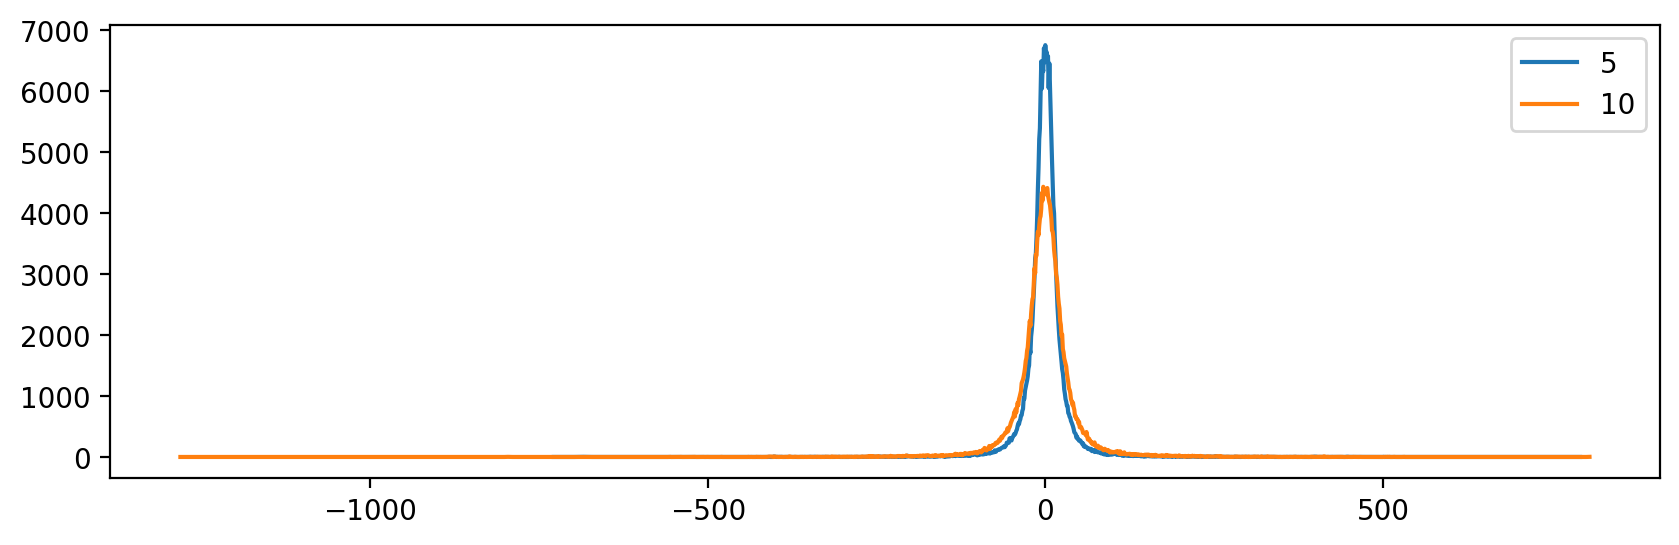

In [38]:
plt.figure(figsize=(10,3), dpi=200)
plt.plot(srs_5, label='5')
plt.plot(srs_10, label='10')
plt.legend()
plt.show()

In [37]:
srs_5 = grouped_DV_5.size()
srs_10 = grouped_DV_10.size()

In [39]:
aggre_info_tick_r5

,Date,EntryDate,BegTime,EndTime,MidPriceBeg,MidPriceEnd,MidPriceWBeg,MidPriceWEnd,Buy/Sell,OrderFlowImba
0,20201020.0,201020.0,90000.0,90000.0,344862.5,344862.5,344858.394161,344867.916667,-1.0,-30.0
1,20201020.0,201020.0,90000.0,90000.0,344862.5,344837.5,344857.086614,344837.692308,1.0,-28.0
2,20201020.0,201020.0,90000.0,90000.0,344862.5,344837.5,344864.495798,344836.046512,1.0,-27.0
3,20201020.0,201020.0,90000.0,90000.0,344862.5,344837.5,344863.425926,344835.826772,1.0,-29.0
4,20201020.0,201020.0,90000.0,90000.0,344862.5,344837.5,344858.669355,344835.826772,1.0,-32.0
...,...,...,...,...,...,...,...,...,...,...
256029,20201020.0,201020.0,153000.0,153000.0,343237.5,343212.5,343233.333333,343201.851852,-1.0,4.0
256030,20201020.0,201020.0,153000.0,153000.0,343237.5,343237.5,343239.285714,343233.333333,-1.0,4.0
256031,20201020.0,201020.0,153000.0,153000.0,343237.5,343237.5,343245.000000,343242.857143,-1.0,6.0
256032,20201020.0,201020.0,153000.0,153000.0,343212.5,343212.5,343201.851852,343205.357143,1.0,14.0


In [63]:
f5 = srs_5.to_frame().reset_index()
T5 = pd.Series(5, index=f5.index)
f5['T'] = T5

In [65]:
f10 = srs_10.to_frame().reset_index()
T10 = pd.Series(10, index=f10.index)
f10['T'] = T10

In [69]:
frame = f5.append(f10, ignore_index=True)
frame

,OrderFlowImba,0,T
0,-728.0,1,5
1,-725.0,1,5
2,-703.0,1,5
3,-697.0,1,5
4,-684.0,3,5
...,...,...,...
1808,798.0,1,10
1809,799.0,1,10
1810,800.0,1,10
1811,801.0,1,10


In [42]:
daily_vol = np.sum(trades_info['TradeVolume'])
daily_vol

1243098

In [52]:
Qi_5 = aggre_info_tick_r5['OrderFlowImba'] / daily_vol
Qi_10 = aggre_info_tick_r10['OrderFlowImba'] / daily_vol

In [50]:
R1 = (trades_info['MidPrice'].shift(1) - trades_info['MidPrice'])  * trades_info['Buy/Sell']
R1[0] = 0

In [51]:
np.average(R1)

4.498679888610719

In [44]:
aggre_info_tick_r5

,Date,EntryDate,BegTime,EndTime,MidPriceBeg,MidPriceEnd,MidPriceWBeg,MidPriceWEnd,Buy/Sell,OrderFlowImba,Qi
0,20201020.0,201020.0,90000.0,90000.0,344862.5,344862.5,344858.394161,344867.916667,-1.0,-30.0,-0.000024
1,20201020.0,201020.0,90000.0,90000.0,344862.5,344837.5,344857.086614,344837.692308,1.0,-28.0,-0.000023
2,20201020.0,201020.0,90000.0,90000.0,344862.5,344837.5,344864.495798,344836.046512,1.0,-27.0,-0.000022
3,20201020.0,201020.0,90000.0,90000.0,344862.5,344837.5,344863.425926,344835.826772,1.0,-29.0,-0.000023
4,20201020.0,201020.0,90000.0,90000.0,344862.5,344837.5,344858.669355,344835.826772,1.0,-32.0,-0.000026
...,...,...,...,...,...,...,...,...,...,...,...
256029,20201020.0,201020.0,153000.0,153000.0,343237.5,343212.5,343233.333333,343201.851852,-1.0,4.0,0.000003
256030,20201020.0,201020.0,153000.0,153000.0,343237.5,343237.5,343239.285714,343233.333333,-1.0,4.0,0.000003
256031,20201020.0,201020.0,153000.0,153000.0,343237.5,343237.5,343245.000000,343242.857143,-1.0,6.0,0.000005
256032,20201020.0,201020.0,153000.0,153000.0,343212.5,343212.5,343201.851852,343205.357143,1.0,14.0,0.000011


In [70]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define functions for optimization
def scale_function(x, alpha, beta):
    """Scaling function
    """
    return x / np.power(1 + np.power(abs(x), alpha), beta/alpha)

def func(qT, chi, kappa, alpha, beta):
    """Function used for optimization
    """
    q = qT[0]
    T = qT[1]
    x = q / np.power(T, kappa)
    return np.power(T, chi) * scale_function( x, alpha, beta ) 

In [81]:
popt, pcov = curve_fit(func, np.transpose(frame.iloc[:, 1:].to_numpy()), frame.iloc[:, 0].to_numpy(), bounds=(0, np.inf))

In [82]:
popt

array([ 1.17794313,  2.2516185 , 14.19110919,  9.63632711])

In [83]:
pcov

array([[ 1.66537618e+01,  1.29450402e+01, -2.21499941e+03,
         1.27767487e+03],
       [ 1.29450402e+01,  1.22825169e+01, -1.82624879e+03,
         1.21799348e+03],
       [-2.21499941e+03, -1.82624879e+03,  4.20809489e+05,
        -1.47983310e+05],
       [ 1.27767487e+03,  1.21799348e+03, -1.47983310e+05,
         1.41536834e+05]])